In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers
from keras import backend as K


Using TensorFlow backend.


In [2]:
np.random.seed(10)

# define hyperparameters

In [3]:
# select data source:
# can be "mill" or "X"
data_source = "X"
# select corruption level:
# can be "light" or "heavy"
corr_level = "light"

# Path to uncorrupted data:
DataPath = "./data/" + data_source + "data.csv"
# Path to corrupted data:
CorruptDataPath = "./data/" + data_source + "datacorrupt" + corr_level + ".csv"



# load data

In [4]:
# Load data from a csv for analysis:
Xdata_df = pd.read_csv(DataPath)
Xdata = Xdata_df.values
del Xdata_df

# Load data with missing values from a csv for analysis:
Xdata_df = pd.read_csv(CorruptDataPath)
Xdata_Missing = Xdata_df.values
del Xdata_df



In [5]:
# Properties of data:
Xdata_length = Xdata_Missing.shape[0] # number of data points to use
n_x = Xdata_Missing.shape[1] # dimensionality of data space

ObsRowInd = np.where(np.isfinite(np.sum(Xdata_Missing,axis=1)))
NanRowInd = np.where(np.isnan(np.sum(Xdata_Missing,axis=1)))
NanIndex = np.where(np.isnan(Xdata_Missing))
Xdata_Missing_Rows = NanRowInd[0] # number of rows with missing values

# Number of missing values
NanCount = len(NanIndex[0])

In [6]:
# Zscore for reconstruction error checking:
scRecon = StandardScaler()
scRecon.fit(Xdata)

# Zscore of data produces much better results
sc = StandardScaler()
Xdata_Missing_complete = np.copy(Xdata_Missing[ObsRowInd[0],:])
# standardise using complete records:
sc.fit(Xdata_Missing_complete)
Xdata_Missing[NanIndex] = 0
Xdata_Missing = sc.transform(Xdata_Missing)
Xdata_Missing[NanIndex] = np.nan

In [7]:
missrate = 0.2

Xdata_train = np.copy(Xdata_Missing[ObsRowInd[0],:])
misssize = int(Xdata_train.shape[0] * missrate)


rowidx = np.random.choice(range(Xdata_train.shape[0]), size=misssize, replace=False)
colidx = np.random.choice(range(Xdata_train.shape[1]), size=misssize, replace=True)

Xdata_train[rowidx, colidx] = 0
del Xdata_Missing_complete

Xdata = sc.transform(Xdata)

In [8]:

Xdata_ref = Xdata_Missing[ObsRowInd[0],:]


# Initialize and train AE

In [9]:
# this is the size of our encoded representations
encoding_dim = 4  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
# this is our input placeholder
input_dim = 4
input_img = Input(shape=(input_dim,))
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

encoded = Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.01))(input_img)
encoded = Dense(16, activation='relu',kernel_regularizer=regularizers.l2(0.01))(encoded)
encoded = Dense(encoding_dim, activation='relu',kernel_regularizer=regularizers.l2(0.01))(encoded)
decoded = Dense(16, activation='relu',kernel_regularizer=regularizers.l2(0.01))(encoded)
decoded = Dense(8, activation='relu',kernel_regularizer=regularizers.l2(0.01))(decoded)
decoded = Dense(input_dim)(decoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')

# train AE on corrupted data:
autoencoder.fit(Xdata_train, Xdata_ref,
                epochs=1000,
                batch_size=32,
                shuffle=True,
                )

Epoch 1/1000
8000/8000 [==============================] - 1s 102us/step - loss: 0.6880
Epoch 2/1000
8000/8000 [==============================] - 0s 49us/step - loss: 0.2674
Epoch 3/1000
8000/8000 [==============================] - 0s 50us/step - loss: 0.1765
Epoch 4/1000
8000/8000 [==============================] - 0s 50us/step - loss: 0.1377
Epoch 5/1000
8000/8000 [==============================] - 0s 54us/step - loss: 0.1152
Epoch 6/1000
8000/8000 [==============================] - 1s 83us/step - loss: 0.1016
Epoch 7/1000
8000/8000 [==============================] - 1s 81us/step - loss: 0.0929
Epoch 8/1000
8000/8000 [==============================] - 1s 70us/step - loss: 0.0871
Epoch 9/1000
8000/8000 [==============================] - 0s 61us/step - loss: 0.0831
Epoch 10/1000
8000/8000 [==============================] - 1s 74us/step - loss: 0.0802
Epoch 11/1000
8000/8000 [==============================] - 0s 60us/step - loss: 0.0781
Epoch 12/1000
8000/8000 [==========================

8000/8000 [==============================] - 1s 104us/step - loss: 0.0580
Epoch 96/1000
8000/8000 [==============================] - 1s 83us/step - loss: 0.0579
Epoch 97/1000
8000/8000 [==============================] - 1s 67us/step - loss: 0.0577
Epoch 98/1000
8000/8000 [==============================] - 1s 89us/step - loss: 0.0577
Epoch 99/1000
8000/8000 [==============================] - 1s 88us/step - loss: 0.0578
Epoch 100/1000
8000/8000 [==============================] - 0s 56us/step - loss: 0.0581
Epoch 101/1000
8000/8000 [==============================] - 0s 51us/step - loss: 0.0578
Epoch 102/1000
8000/8000 [==============================] - 0s 61us/step - loss: 0.0576
Epoch 103/1000
8000/8000 [==============================] - 1s 64us/step - loss: 0.0575
Epoch 104/1000
8000/8000 [==============================] - 1s 76us/step - loss: 0.0576
Epoch 105/1000
8000/8000 [==============================] - 1s 68us/step - loss: 0.0575
Epoch 106/1000
8000/8000 [========================

8000/8000 [==============================] - 0s 50us/step - loss: 0.0540
Epoch 189/1000
8000/8000 [==============================] - 0s 50us/step - loss: 0.0540
Epoch 190/1000
8000/8000 [==============================] - 0s 49us/step - loss: 0.0541
Epoch 191/1000
8000/8000 [==============================] - 0s 52us/step - loss: 0.0539
Epoch 192/1000
8000/8000 [==============================] - 0s 53us/step - loss: 0.0540
Epoch 193/1000
8000/8000 [==============================] - 1s 87us/step - loss: 0.0537
Epoch 194/1000
8000/8000 [==============================] - 1s 92us/step - loss: 0.0537
Epoch 195/1000
8000/8000 [==============================] - 0s 48us/step - loss: 0.0535
Epoch 196/1000
8000/8000 [==============================] - 1s 78us/step - loss: 0.0538
Epoch 197/1000
8000/8000 [==============================] - 0s 51us/step - loss: 0.0536
Epoch 198/1000
8000/8000 [==============================] - 0s 51us/step - loss: 0.0536
Epoch 199/1000
8000/8000 [=====================

8000/8000 [==============================] - 0s 59us/step - loss: 0.0515
Epoch 282/1000
8000/8000 [==============================] - 1s 65us/step - loss: 0.0517
Epoch 283/1000
8000/8000 [==============================] - 0s 62us/step - loss: 0.0515
Epoch 284/1000
8000/8000 [==============================] - 1s 63us/step - loss: 0.0516
Epoch 285/1000
8000/8000 [==============================] - 0s 62us/step - loss: 0.0513
Epoch 286/1000
8000/8000 [==============================] - 1s 72us/step - loss: 0.0514
Epoch 287/1000
8000/8000 [==============================] - 0s 60us/step - loss: 0.0517
Epoch 288/1000
8000/8000 [==============================] - 1s 99us/step - loss: 0.0515
Epoch 289/1000
8000/8000 [==============================] - 0s 53us/step - loss: 0.0513
Epoch 290/1000
8000/8000 [==============================] - 1s 69us/step - loss: 0.0515
Epoch 291/1000
8000/8000 [==============================] - 0s 51us/step - loss: 0.0513
Epoch 292/1000
8000/8000 [=====================

8000/8000 [==============================] - 0s 52us/step - loss: 0.0500
Epoch 373/1000
8000/8000 [==============================] - 0s 49us/step - loss: 0.0500
Epoch 374/1000
8000/8000 [==============================] - 0s 55us/step - loss: 0.0500
Epoch 375/1000
8000/8000 [==============================] - 0s 58us/step - loss: 0.0502
Epoch 376/1000
8000/8000 [==============================] - 0s 49us/step - loss: 0.0501
Epoch 377/1000
8000/8000 [==============================] - 1s 66us/step - loss: 0.0502
Epoch 378/1000
8000/8000 [==============================] - 1s 83us/step - loss: 0.0500
Epoch 379/1000
8000/8000 [==============================] - 1s 63us/step - loss: 0.0498
Epoch 380/1000
8000/8000 [==============================] - 1s 81us/step - loss: 0.0501
Epoch 381/1000
8000/8000 [==============================] - 1s 63us/step - loss: 0.0499
Epoch 382/1000
8000/8000 [==============================] - 0s 50us/step - loss: 0.0501
Epoch 383/1000
8000/8000 [=====================

8000/8000 [==============================] - 0s 51us/step - loss: 0.0489
Epoch 466/1000
8000/8000 [==============================] - 1s 90us/step - loss: 0.0487
Epoch 467/1000
8000/8000 [==============================] - 0s 60us/step - loss: 0.0495
Epoch 468/1000
8000/8000 [==============================] - 0s 53us/step - loss: 0.0490
Epoch 469/1000
8000/8000 [==============================] - 0s 50us/step - loss: 0.0488
Epoch 470/1000
8000/8000 [==============================] - 1s 68us/step - loss: 0.0486
Epoch 471/1000
8000/8000 [==============================] - 1s 73us/step - loss: 0.0490
Epoch 472/1000
8000/8000 [==============================] - 1s 78us/step - loss: 0.0489
Epoch 473/1000
8000/8000 [==============================] - 1s 68us/step - loss: 0.0489
Epoch 474/1000
8000/8000 [==============================] - 1s 70us/step - loss: 0.0488
Epoch 475/1000
8000/8000 [==============================] - 0s 57us/step - loss: 0.0489
Epoch 476/1000
8000/8000 [=====================

8000/8000 [==============================] - 0s 56us/step - loss: 0.0485
Epoch 559/1000
8000/8000 [==============================] - 0s 55us/step - loss: 0.0479
Epoch 560/1000
8000/8000 [==============================] - 0s 57us/step - loss: 0.0481
Epoch 561/1000
8000/8000 [==============================] - 0s 48us/step - loss: 0.0478
Epoch 562/1000
8000/8000 [==============================] - 0s 53us/step - loss: 0.0480
Epoch 563/1000
8000/8000 [==============================] - 1s 69us/step - loss: 0.0481
Epoch 564/1000
8000/8000 [==============================] - 0s 50us/step - loss: 0.0478
Epoch 565/1000
8000/8000 [==============================] - 0s 48us/step - loss: 0.0479
Epoch 566/1000
8000/8000 [==============================] - 1s 65us/step - loss: 0.0479
Epoch 567/1000
8000/8000 [==============================] - 0s 60us/step - loss: 0.0478
Epoch 568/1000
8000/8000 [==============================] - 0s 48us/step - loss: 0.0481
Epoch 569/1000
8000/8000 [=====================

8000/8000 [==============================] - 0s 48us/step - loss: 0.0471
Epoch 652/1000
8000/8000 [==============================] - 0s 61us/step - loss: 0.0471
Epoch 653/1000
8000/8000 [==============================] - 1s 71us/step - loss: 0.0478
Epoch 654/1000
8000/8000 [==============================] - 0s 51us/step - loss: 0.0471
Epoch 655/1000
8000/8000 [==============================] - 0s 52us/step - loss: 0.0471
Epoch 656/1000
8000/8000 [==============================] - 1s 65us/step - loss: 0.0472
Epoch 657/1000
8000/8000 [==============================] - 0s 52us/step - loss: 0.0474
Epoch 658/1000
8000/8000 [==============================] - 0s 50us/step - loss: 0.0469
Epoch 659/1000
8000/8000 [==============================] - 0s 52us/step - loss: 0.0470
Epoch 660/1000
8000/8000 [==============================] - 1s 71us/step - loss: 0.0472
Epoch 661/1000
8000/8000 [==============================] - 0s 48us/step - loss: 0.0471
Epoch 662/1000
8000/8000 [=====================

8000/8000 [==============================] - 0s 57us/step - loss: 0.0471
Epoch 745/1000
8000/8000 [==============================] - 1s 64us/step - loss: 0.0467
Epoch 746/1000
8000/8000 [==============================] - 0s 55us/step - loss: 0.0469
Epoch 747/1000
8000/8000 [==============================] - 0s 56us/step - loss: 0.0468
Epoch 748/1000
8000/8000 [==============================] - 0s 62us/step - loss: 0.0469
Epoch 749/1000
8000/8000 [==============================] - ETA: 0s - loss: 0.047 - 1s 77us/step - loss: 0.0470
Epoch 750/1000
8000/8000 [==============================] - 0s 62us/step - loss: 0.0467
Epoch 751/1000
8000/8000 [==============================] - 0s 54us/step - loss: 0.0472
Epoch 752/1000
8000/8000 [==============================] - 0s 50us/step - loss: 0.0468
Epoch 753/1000
8000/8000 [==============================] - 1s 68us/step - loss: 0.0468
Epoch 754/1000
8000/8000 [==============================] - 0s 57us/step - loss: 0.0470
Epoch 755/1000
8000/800

Epoch 837/1000
8000/8000 [==============================] - 1s 65us/step - loss: 0.0472
Epoch 838/1000
8000/8000 [==============================] - 0s 62us/step - loss: 0.0470
Epoch 839/1000
8000/8000 [==============================] - 1s 71us/step - loss: 0.0465
Epoch 840/1000
8000/8000 [==============================] - 0s 54us/step - loss: 0.0464
Epoch 841/1000
8000/8000 [==============================] - 1s 70us/step - loss: 0.0469
Epoch 842/1000
8000/8000 [==============================] - 1s 74us/step - loss: 0.0465
Epoch 843/1000
8000/8000 [==============================] - 0s 51us/step - loss: 0.0469
Epoch 844/1000
8000/8000 [==============================] - 0s 49us/step - loss: 0.0468
Epoch 845/1000
8000/8000 [==============================] - 0s 48us/step - loss: 0.0468
Epoch 846/1000
8000/8000 [==============================] - 1s 75us/step - loss: 0.0463
Epoch 847/1000
8000/8000 [==============================] - 1s 102us/step - loss: 0.0468
Epoch 848/1000
8000/8000 [=====

8000/8000 [==============================] - 0s 49us/step - loss: 0.0463
Epoch 931/1000
8000/8000 [==============================] - 0s 57us/step - loss: 0.0463
Epoch 932/1000
8000/8000 [==============================] - 0s 59us/step - loss: 0.0462
Epoch 933/1000
8000/8000 [==============================] - 0s 48us/step - loss: 0.0460
Epoch 934/1000
8000/8000 [==============================] - 0s 47us/step - loss: 0.0462
Epoch 935/1000
8000/8000 [==============================] - 0s 52us/step - loss: 0.0461
Epoch 936/1000
8000/8000 [==============================] - 1s 71us/step - loss: 0.0466
Epoch 937/1000
8000/8000 [==============================] - 0s 52us/step - loss: 0.0460
Epoch 938/1000
8000/8000 [==============================] - 0s 49us/step - loss: 0.0468
Epoch 939/1000
8000/8000 [==============================] - 0s 48us/step - loss: 0.0462
Epoch 940/1000
8000/8000 [==============================] - 0s 46us/step - loss: 0.0465
Epoch 941/1000
8000/8000 [=====================

# IMPUTE MISSING VALUES

In [10]:

def impute(X_corrupt, max_iter = 10):
        """ Use AE to impute missing values in X_corrupt. Missing values
            are indicated by a NaN.
        """
        # Select the rows of the datset which have one or more missing values:
        NanRowIndex = np.where(np.isnan(np.sum(X_corrupt,axis=1)))
        x_miss_val = X_corrupt[NanRowIndex[0],:]
        
        # initialise missing values with arbitrary value
        NanIndex = np.where(np.isnan(x_miss_val))
        x_miss_val[NanIndex] = 0
        
        MissVal = np.zeros([max_iter,len(NanIndex[0])], dtype=np.float32)
        
        for i in range(max_iter):
            MissVal[i,:] = x_miss_val[NanIndex]
            
            # reconstruct the inputs, using the mean:
            x_reconstruct = autoencoder.predict(x_miss_val)
            x_miss_val[NanIndex] = x_reconstruct[NanIndex]
        
        X_corrupt[NanRowIndex,:] = x_miss_val
        X_imputed = X_corrupt
        return X_imputed, MissVal

In [11]:
Xdata_test = Xdata_Missing
imputed, missval = impute(Xdata_test, max_iter = 10)

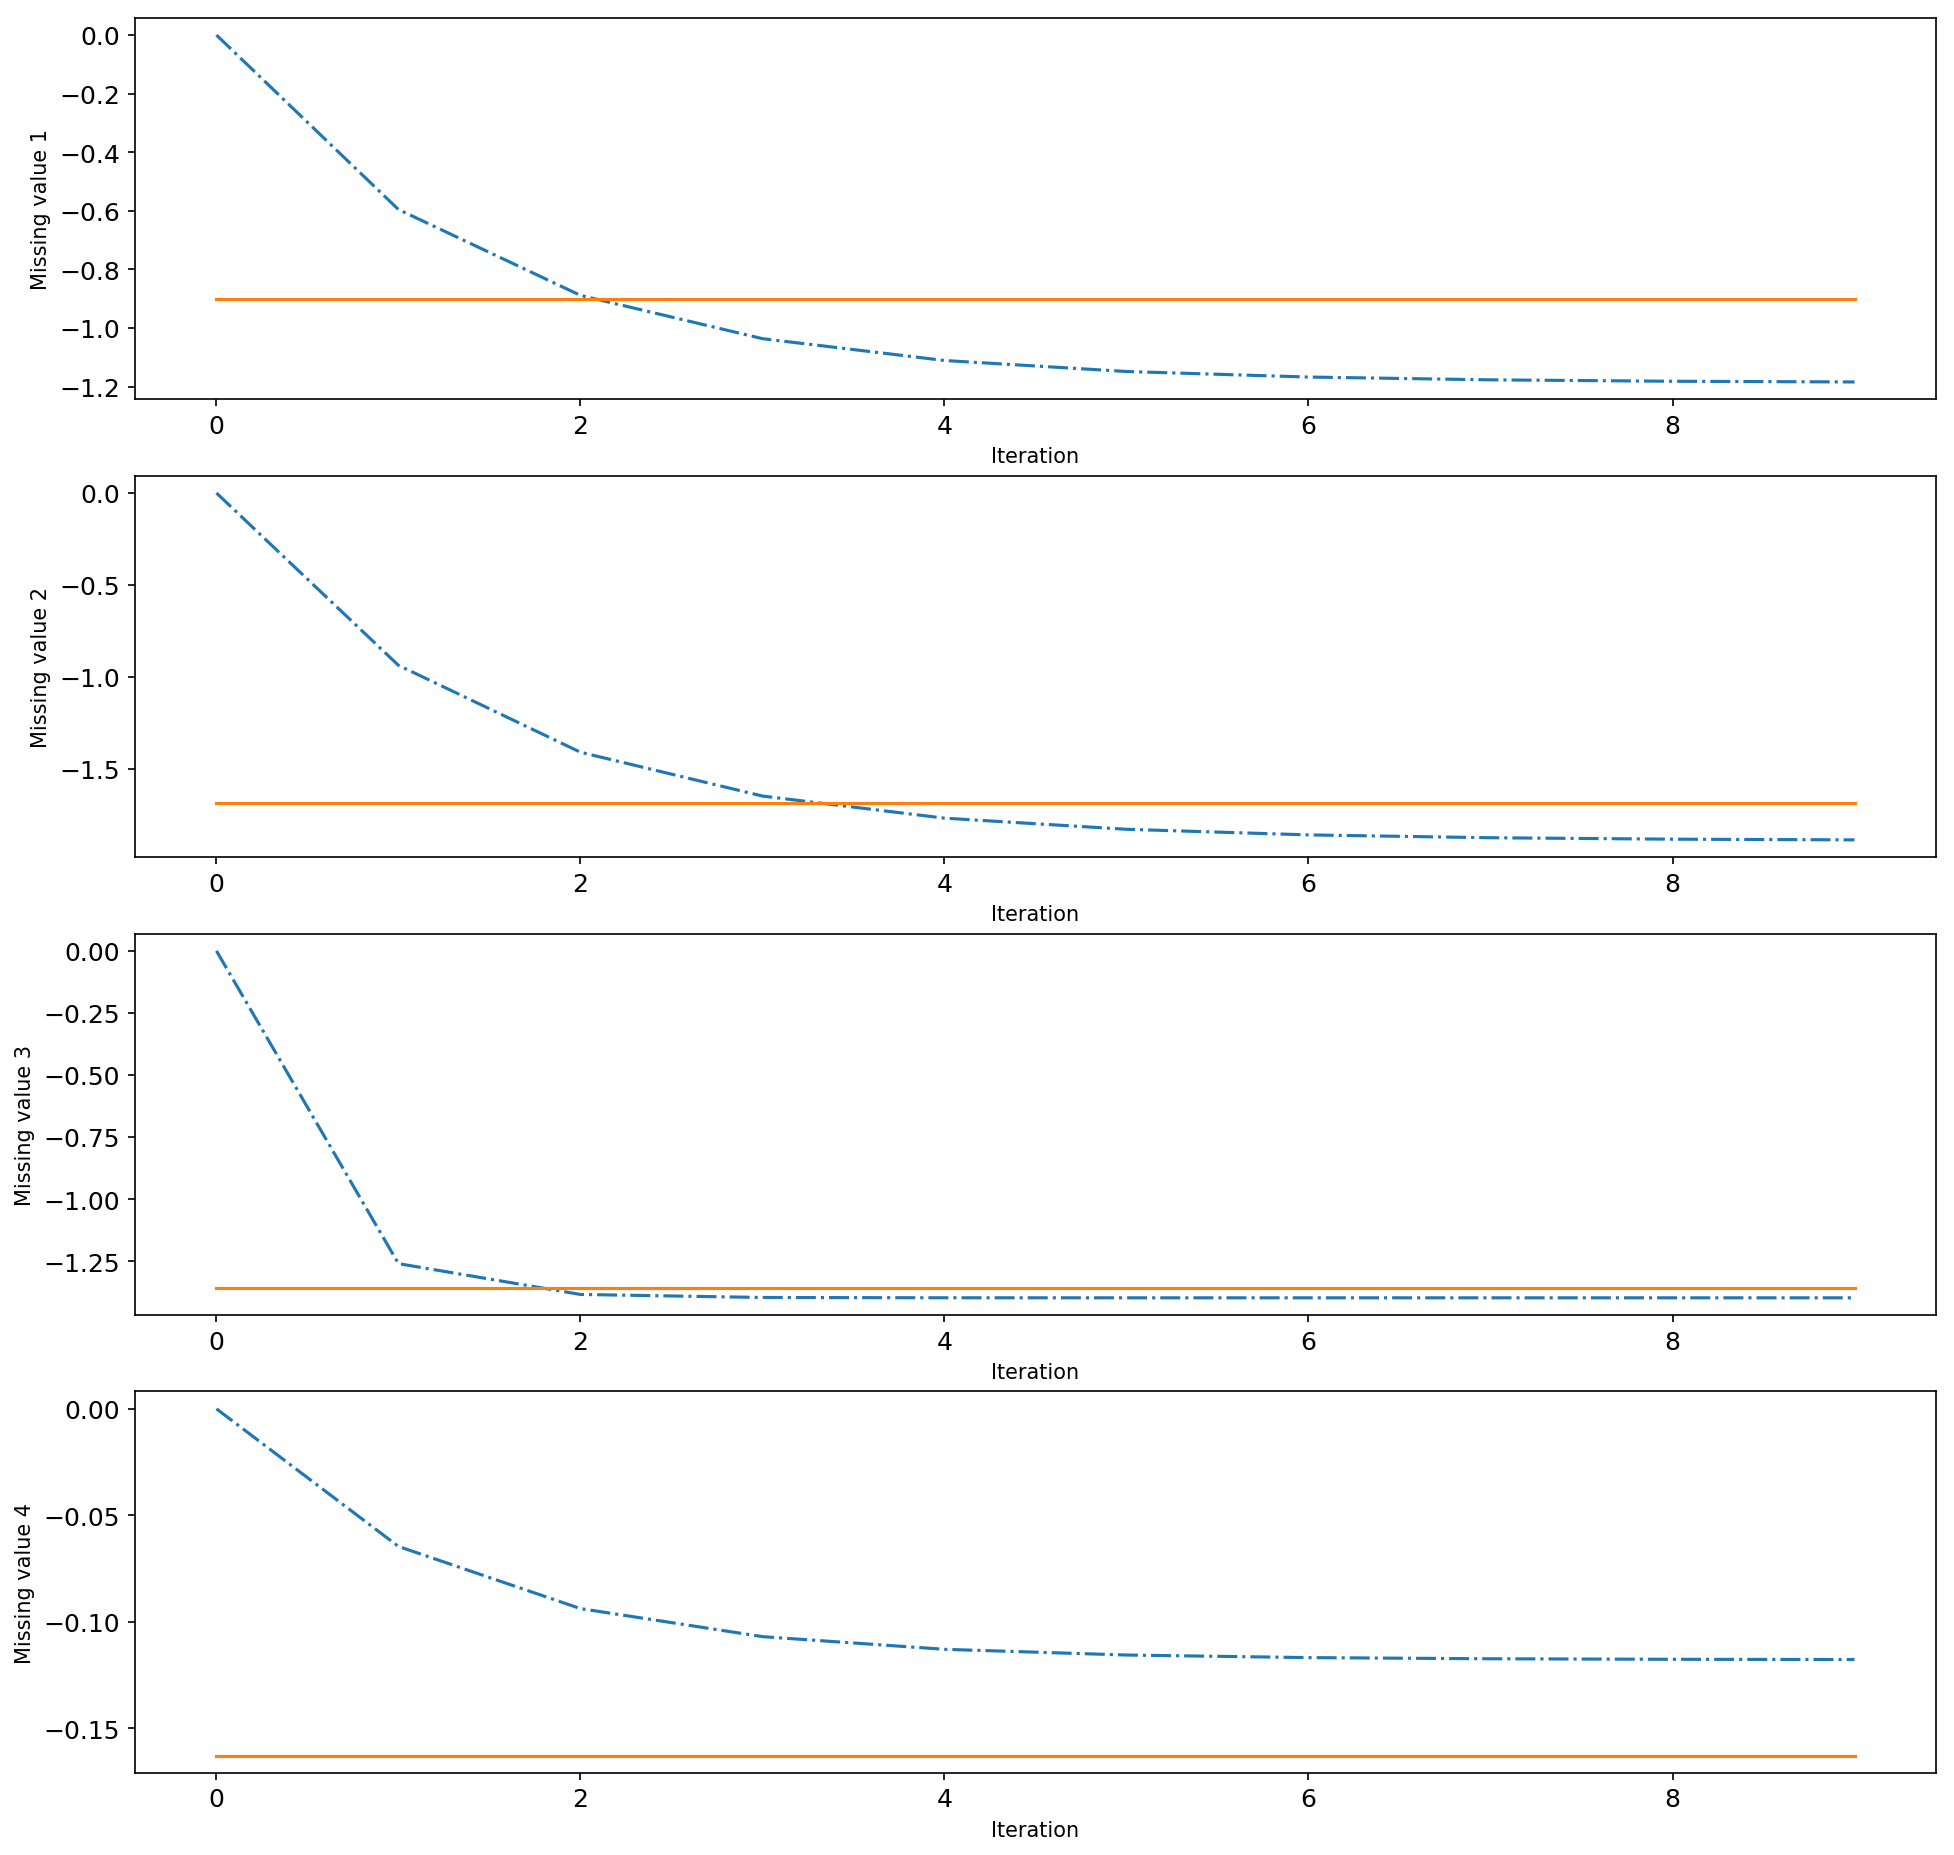

In [12]:
ImputeIter = 10
# plot imputation results for sample values:
fig = plt.figure(dpi = 150)

subplotmax = min(NanCount,4)
for plotnum in range(subplotmax):
    TrueVal = Xdata[NanIndex[0][plotnum]][NanIndex[1][plotnum]]
    plt.subplot(subplotmax,1,plotnum+1)
    plt.plot(range(ImputeIter),missval[:,plotnum],'-.')
    plt.plot([0, ImputeIter-1],[TrueVal, TrueVal])
    plt.xlabel('Iteration')
    plt.ylabel('Missing value ' + str(plotnum+1), fontsize=10)
    plt.tick_params(labelsize='large')
fig = plt.gcf()
fig.set_size_inches(15.5, 15.5)
fig.savefig('AE_heavy_corrupted_mean.png', dpi=100)

In [13]:
Xdata = sc.inverse_transform(Xdata)
X_impute = sc.inverse_transform(imputed)

Xdata = scRecon.transform(Xdata)
X_impute = scRecon.transform(X_impute)

In [14]:
ReconstructionError_l2 = (sum((X_impute[NanIndex] - Xdata[NanIndex])**2)/NanCount)**0.5
print('Reconstructionl2 error (AE): ', ReconstructionError_l2)

ReconstructionError_baseline_l2 = (sum((Xdata[NanIndex])**2)/NanCount)**0.5
print('Reconstruction error (replace with mean) l2: ', ReconstructionError_baseline_l2)




Reconstructionl2 error (AE):  0.20110184717352111
Reconstruction error (replace with mean) l2:  1.0010680700177845


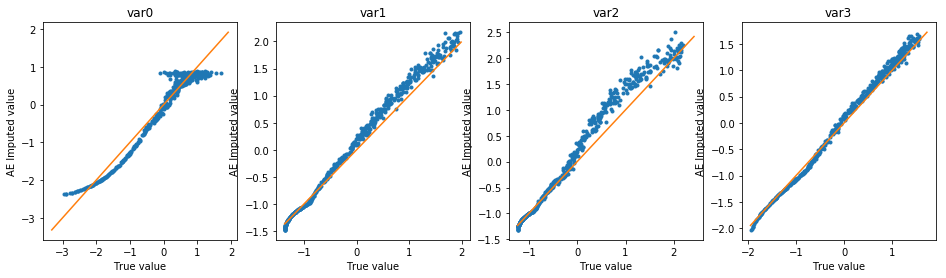

In [15]:
fig_h, subplot_grid = plt.subplots(nrows=1, ncols=4,  figsize=(16,4)) #, sharex=True, sharey=True, squeeze=False)
#min_i = np.min(Xdata[:,var_i])
#max_i = np.max(Xdata[:,var_i])
for i in range(4):
    #print(i)
    var_i = i 
    min_i = np.min(Xdata[:,var_i])
    max_i = np.max(Xdata[:,var_i])
    subplot_grid[i].plot(Xdata[NanIndex[0][np.where(NanIndex[1]==var_i)],var_i],X_impute[NanIndex[0][np.where(NanIndex[1]==var_i)],var_i],'.')
    subplot_grid[i].plot([min_i, max_i], [min_i, max_i]) #the line
    subplot_grid[i].set_xlabel('True value')
    subplot_grid[i].set_ylabel('AE Imputed value')
    subplot_grid[i].set_title('var' + str(i))

fig_h.savefig('AE_heavy_corrupted_mean.png', dpi=100)

